# Demo for CLIP
CLIP is a Vision Lanuage Model published by OpenAI. It combines Vision & Language and we can do some cool stuff with it.
Here is a demo of what you can for example do with it.

In [ ]:
# Install the required packages
%pip install torch torchvision
%pip install open_clip_torch

In [ ]:
import torch
from PIL import Image
import open_clip
from pathlib import Path
from tqdm import tqdm

In [3]:
# Load the model
model, _, preprocess = open_clip.create_model_and_transforms('ViT-B-32', pretrained='laion2b_s34b_b79k')
tokenizer = open_clip.get_tokenizer('ViT-B-32')

In [4]:
# Simple function for loading an image and pre-processing it
def load_and_process_image(image_path):
    image = Image.open(str(image_path))
    inputs = preprocess(image).unsqueeze(0)
    image_features = model.encode_image(inputs)
    image_features /= image_features.norm(dim=-1, keepdim=True)
    return image_features, image

# Shortcut function for processing text in CLIP
def process_text(texts, formatted="this is an image of {}"):
    if formatted:
        texts = [formatted.format(c) for c in texts]
    texts = tokenizer(texts)

    text_features = model.encode_text(texts)
    text_features /= text_features.norm(dim=-1, keepdim=True)

    return text_features

# Helper to display images
def show_image(pil_image, max_size=400):
    pil_image.thumbnail((max_size, max_size))
    return display(pil_image)

# Helper to display the results of classification
def print_classes(classes, text_probs):
    max_idx = torch.max(text_probs, dim=1)[1].item()
    for i in range(len(classes)):
        text = f"- {classes[i]:<12} {text_probs[0, i].item()*100:.2f}%"
        if i == max_idx:
            text += " (best match)"
        print(text)

## Different concepts
CLIP can understand vastly different concepts. An example below

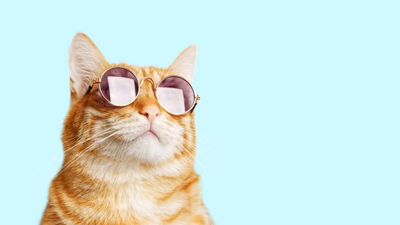

- a diagram    0.00%
- a dog        0.01%
- a cat        99.99% (best match)
- a car        0.00%
--------------------



- a diagram    0.00%
- a dog        0.00%
- a cat        0.00%
- a car        100.00% (best match)
--------------------



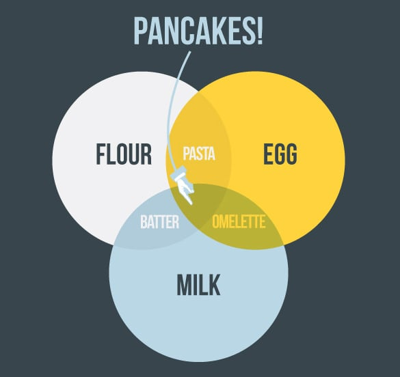

- a diagram    100.00% (best match)
- a dog        0.00%
- a cat        0.00%
- a car        0.00%
--------------------



- a diagram    0.00%
- a dog        100.00% (best match)
- a cat        0.00%
- a car        0.00%
--------------------



In [20]:
classes = ["a diagram", "a dog", "a cat", "a car"]
text_features = process_text(classes)

dir = Path("images/start/")
for image_path in dir.glob("*"):
    image_features, image = load_and_process_image(image_path)
    text_probs = (100.0 * image_features @ text_features.T).softmax(dim=-1)
    show_image(image)
    print_classes(classes, text_probs)
    print("--------------------\n")

## Specific concepts
It can also be more specific, such as different breeds of cats

- European Shorthair 0.03%
- Maine Coon   0.00%
- Siamese      99.88% (best match)
- British Shorthair 0.08%
- Persian      0.00%
--------------------



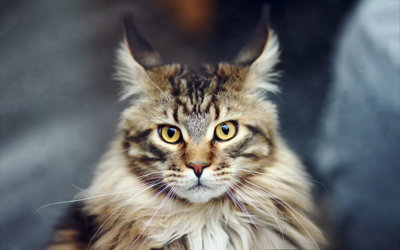

- European Shorthair 0.00%
- Maine Coon   99.70% (best match)
- Siamese      0.00%
- British Shorthair 0.00%
- Persian      0.30%
--------------------



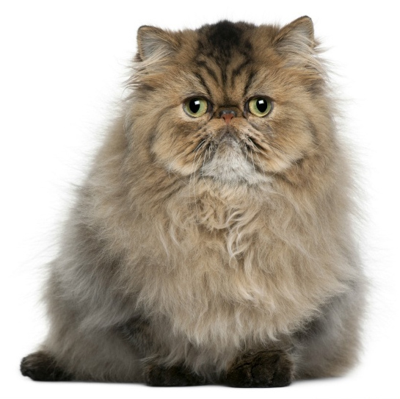

- European Shorthair 0.00%
- Maine Coon   0.08%
- Siamese      0.00%
- British Shorthair 0.01%
- Persian      99.91% (best match)
--------------------



- European Shorthair 92.85% (best match)
- Maine Coon   4.67%
- Siamese      0.06%
- British Shorthair 1.48%
- Persian      0.94%
--------------------



- European Shorthair 0.75%
- Maine Coon   0.00%
- Siamese      0.00%
- British Shorthair 99.11% (best match)
- Persian      0.14%
--------------------



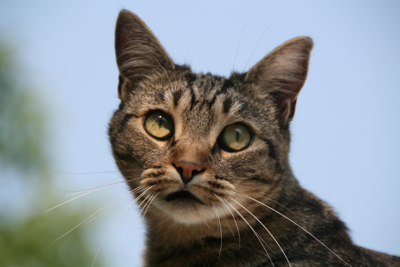

- European Shorthair 99.06% (best match)
- Maine Coon   0.29%
- Siamese      0.00%
- British Shorthair 0.59%
- Persian      0.06%
--------------------



In [21]:
classes = ["European Shorthair", "Maine Coon", "Siamese", "British Shorthair", "Persian"]
text_features = process_text(classes, formatted="this image contains a {}, a cat breed")

dir = Path("images/cat_breeds/")
for image_path in dir.glob("*.jpg"):
    image_features, image = load_and_process_image(image_path)
    text_probs = (100.0 * image_features @ text_features.T).softmax(dim=-1)
    show_image(image)
    print_classes(classes, text_probs)
    print("--------------------\n")

## Abstract concepts
Also more abstract concepts such as seasons & cities.

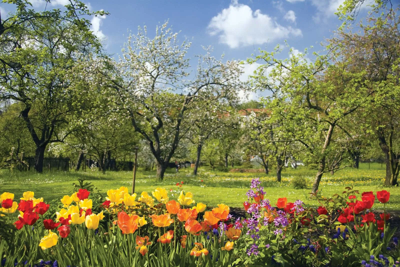

- spring       99.67% (best match)
- summer       0.33%
- autumn       0.00%
- winter       0.00%
--------------------



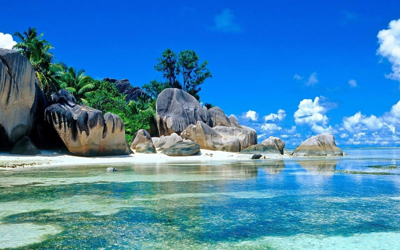

- spring       0.26%
- summer       99.34% (best match)
- autumn       0.01%
- winter       0.39%
--------------------



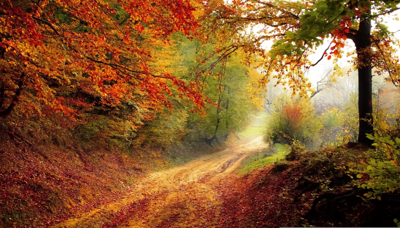

- spring       0.00%
- summer       0.03%
- autumn       99.96% (best match)
- winter       0.01%
--------------------



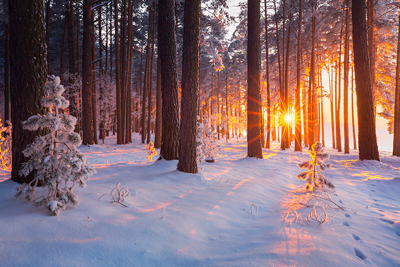

- spring       0.08%
- summer       0.07%
- autumn       0.01%
- winter       99.84% (best match)
--------------------



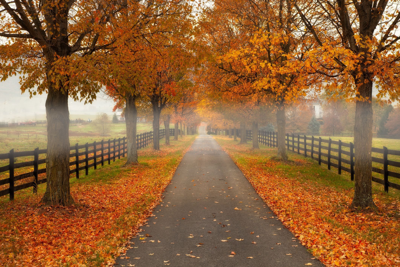

- spring       0.00%
- summer       0.01%
- autumn       99.99% (best match)
- winter       0.00%
--------------------



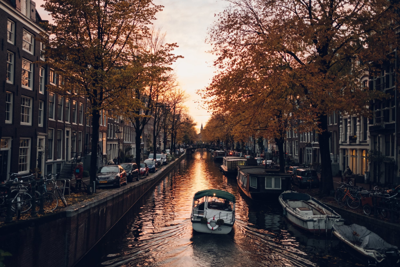

- spring       0.32%
- summer       1.45%
- autumn       97.49% (best match)
- winter       0.74%
--------------------



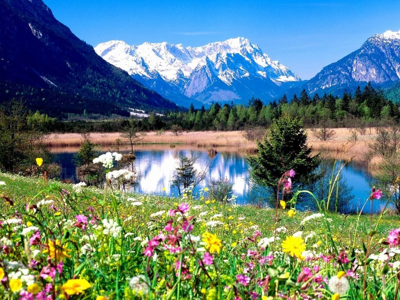

- spring       54.51% (best match)
- summer       45.39%
- autumn       0.04%
- winter       0.07%
--------------------



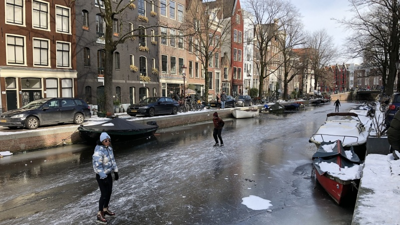

- spring       0.23%
- summer       0.06%
- autumn       0.00%
- winter       99.71% (best match)
--------------------



In [22]:
classes = ["spring", "summer", "autumn", "winter"]
text_features = process_text(classes, formatted="this image is taken in {}")

dir = Path("images/seasons/")
for image_path in dir.glob("*"):
    image_features, image = load_and_process_image(image_path)
    text_probs = (100.0 * image_features @ text_features.T).softmax(dim=-1)
    show_image(image)
    print_classes(classes, text_probs)
    print("--------------------\n")

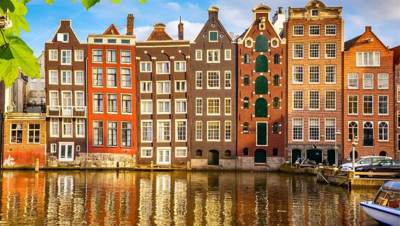

- amsterdam    100.00% (best match)
- new york     0.00%
- tokyo        0.00%
- paris        0.00%
--------------------



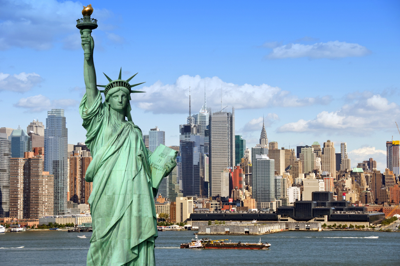

- amsterdam    0.00%
- new york     100.00% (best match)
- tokyo        0.00%
- paris        0.00%
--------------------



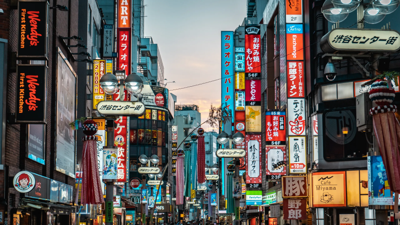

- amsterdam    0.00%
- new york     0.00%
- tokyo        100.00% (best match)
- paris        0.00%
--------------------



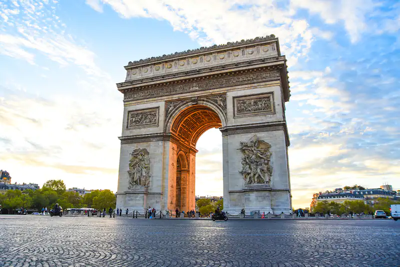

- amsterdam    0.00%
- new york     0.00%
- tokyo        0.00%
- paris        100.00% (best match)
--------------------



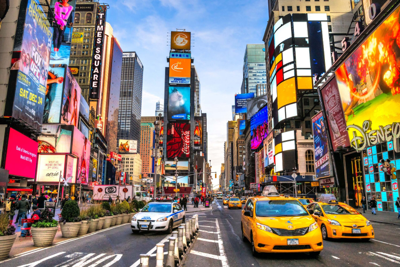

- amsterdam    0.00%
- new york     99.96% (best match)
- tokyo        0.04%
- paris        0.00%
--------------------



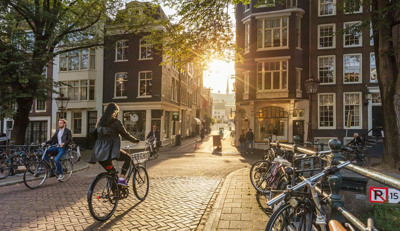

- amsterdam    100.00% (best match)
- new york     0.00%
- tokyo        0.00%
- paris        0.00%
--------------------



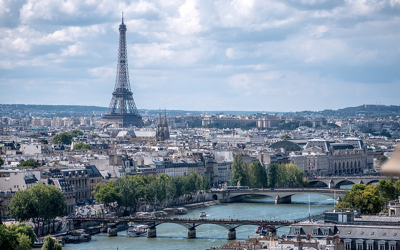

- amsterdam    0.00%
- new york     0.00%
- tokyo        0.00%
- paris        100.00% (best match)
--------------------



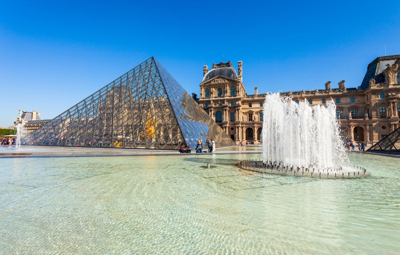

- amsterdam    0.00%
- new york     0.00%
- tokyo        0.00%
- paris        99.99% (best match)
--------------------



In [23]:
classes = ["amsterdam", "new york", "tokyo", "paris"]
text_features = process_text(classes, formatted="this image is taken in {}")

dir = Path("images/cities/")
for image_path in dir.glob("*"):
    image_features, image = load_and_process_image(image_path)
    text_probs = (100.0 * image_features @ text_features.T).softmax(dim=-1)
    show_image(image)
    print_classes(classes, text_probs)
    print("--------------------\n")

# Image Retrieval
We can also do some image retrieval. Select the best images given a query.

In [7]:
dir = Path("images/cats/")

all_images = []
all_image_features = []
for image_path in tqdm(list(dir.glob("*"))):
    image_features, image = load_and_process_image(image_path)
    all_images.append(image)
    all_image_features.append(image_features)

100%|██████████| 8/8 [00:02<00:00,  3.82it/s]


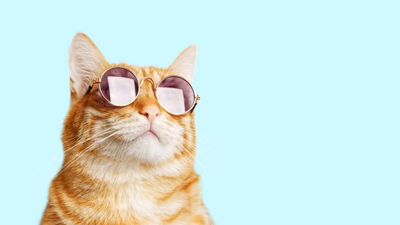

Similarity: 33.95
--------------------


Similarity: 24.53
--------------------


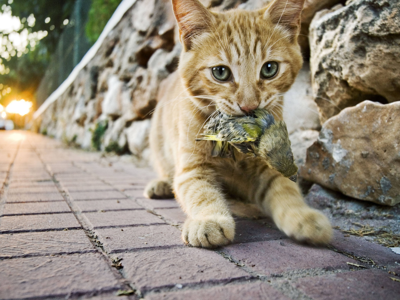

Similarity: 22.70
--------------------


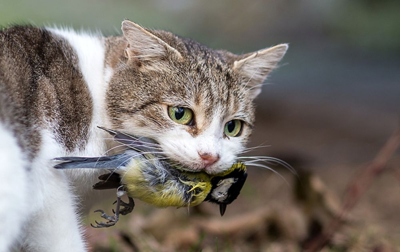

Similarity: 22.53
--------------------


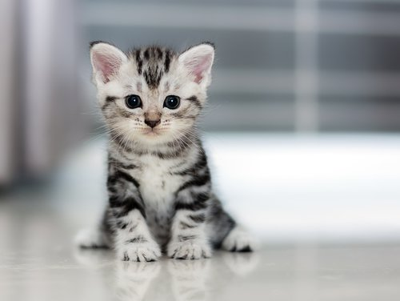

Similarity: 22.45
--------------------


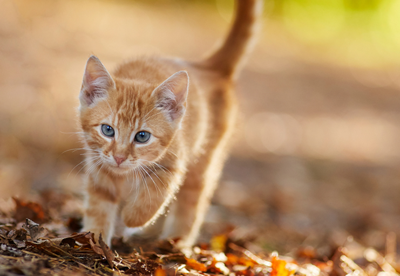

Similarity: 21.72
--------------------


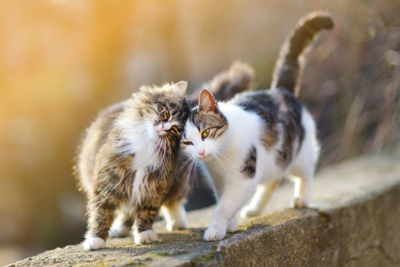

Similarity: 20.83
--------------------


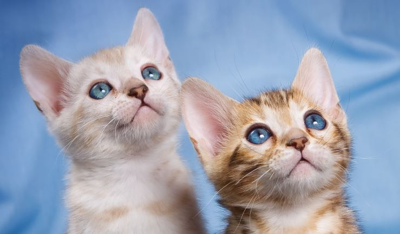

Similarity: 20.39
--------------------


In [19]:
classes = ["cat with glasses"]
text_features = process_text(classes, formatted="this image contains {}")

probs = (100.0 * torch.concat(all_image_features) @ text_features.T)
sorted_indexes = torch.argsort(probs.squeeze(), dim=0, descending=True).tolist()

for i in sorted_indexes:
    show_image(all_images[i])
    print(f"Similarity: {probs[i].item():.2f}")
    print("--------------------")